In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [34]:
# Load the dataset
data =pd.read_csv(r"C:\Users\HP\Downloads\insurance-data.csv")


In [35]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [36]:
data.shape 

(1338, 7)

In [37]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [38]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
# Assuming 'column_name' is the name of the column for which you want unique values
unique_values = data['region'].unique()

# Print the unique values
print(unique_values)


['southwest' 'southeast' 'northwest' 'northeast']


In [41]:
data.isnull()

age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]

In [42]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [44]:
data.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

In [45]:
# Check the data types of each column
print(data.dtypes)

age                   int64
bmi                 float64
children              int64
charges             float64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


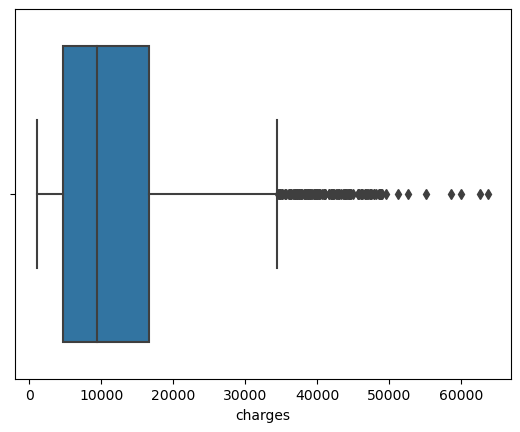

In [46]:
sns.boxplot(x=data["charges"])
plt.show()

In [47]:
# Calculate Z-scores for 'charges'
z_scores = np.abs((data['charges'] - data['charges'].mean()) / data['charges'].std())

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers_charges = z_scores > threshold

# Remove outliers from the DataFrame
data_no_outliers = data[~outliers_charges]


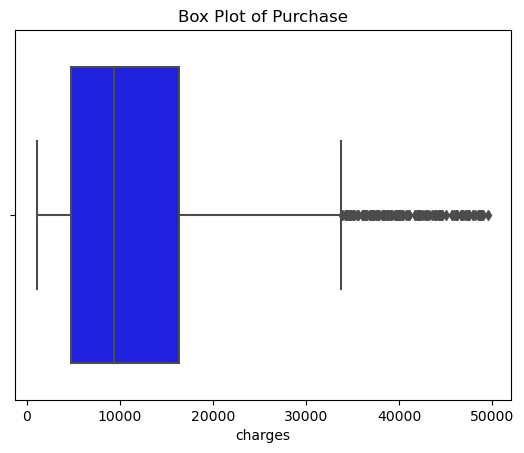

In [48]:
# without outlier
sns.boxplot(x=data_no_outliers['charges'], color='blue')
plt.xlabel('charges')
plt.title('Box Plot of Purchase')
plt.show()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [50]:
correlation = data.corr()
correlation

age       bmi  children   charges  sex_male  \
age               1.000000  0.109272  0.042469  0.299008 -0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.057292   
sex_male         -0.020856  0.046371  0.017163  0.057292  1.000000   
smoker_yes       -0.025019  0.003750  0.007673  0.787251  0.076185   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.004184   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.025019         -0.000407         -0.011642   
bmi                 0.003750         -0.135996          0.270025   
children            0.007673          0.024806         -0.023066   
charges             0.787251         -0.039905          0.073982   
sex_male            0.076185         -0.011156          0.017117   
smoker_yes          1.000000         -0.036945          0.068498   
region_northwest   -0.036945          1.000000         -0.346265   
region_southeast    0.068498         -0.346265          1.000000   
region_southwest   -0.036945         -0.320829         -0.346265   

                  region_southwest  
age                       0.010016  
bmi                      -0.006205  
children                  0.021914  
charges                  -0.043210  
sex_male                 -0.004184  
smoker_yes               -0.036945  
region_northwest         -0.320829  
region_southeast         -0.346265  
region_southwest          1.000000

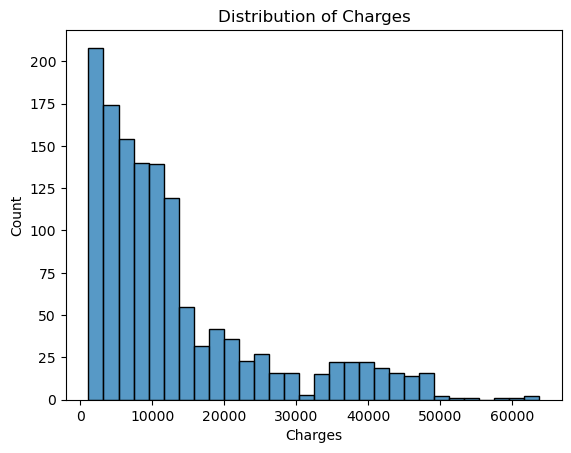

In [51]:
# Visualize the distribution of the target variable
sns.histplot(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges')
plt.show()

In [58]:
#4: Data Visualization
# Example: Scatter plot of age vs. charges
plt.scatter(X_train['age'], y_train)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()

NameError: name 'X_train' is not defined

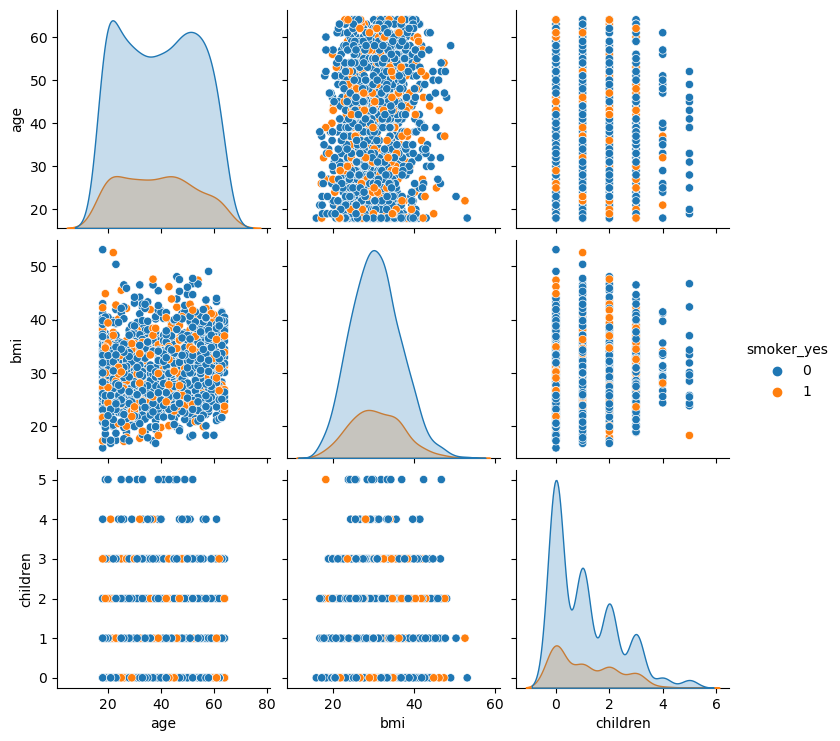

In [59]:
# Visualize the relationship between features and target variable
sns.pairplot(data, vars=['age', 'bmi', 'children'], hue='smoker_yes')
plt.show()

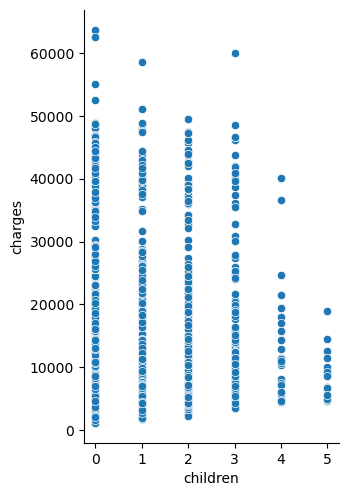

In [60]:
# Data Visualization
sns.pairplot(data, x_vars=['children'], y_vars='charges', height=5, aspect=0.7)
plt.show()

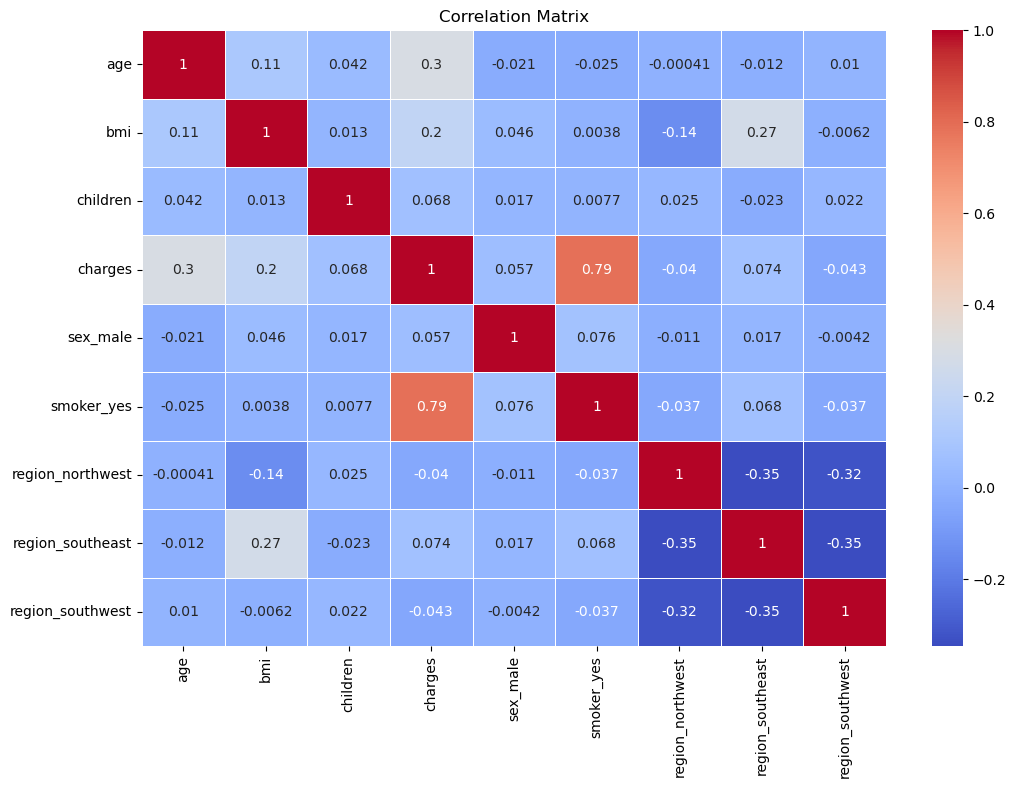

In [61]:
# Data Visualization - Correlation Matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [62]:
data.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

In [63]:
# Split the data into features and target variable
X = data.drop('charges', axis=1)
y = data['charges']


In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Step 5: Machine Learning Models
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regression', SVR()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('KNN Regression', KNeighborsRegressor()),
     ('Gradient Boosting Regression', GradientBoostingRegressor())
]

In [66]:
for name, model in models:
    # Create a pipeline with data preprocessing and model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

In [73]:

# Hyperparameter Tuning
param_grid = [
    {'regressor__fit_intercept': [True, False]},  # Linear Regression
    {'regressor__kernel': ['linear', 'poly', 'rbf'], 'regressor__C': [0.1, 1, 10]},  # SVR
    {'regressor__max_depth': [None, 5, 10]},  # Decision Tree
    {'regressor__n_estimators': [100, 200, 300]},  # Random Forest
    {'regressor__n_neighbors': [3, 5, 7]} , # KNN
     {'regressor__n_estimators': [50, 100, 150], 'regressor__learning_rate': [0.01, 0.1, 0.2], 'regressor__max_depth': [3, 5, 7]}  # Gradient Boosting
]

In [74]:
for name, model in models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

In [75]:


# Iterate over the models
for name, model in models:
    # Create a pipeline with preprocessing steps (if needed) and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Example preprocessing step
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = pipeline.predict(X_test)
      
        
     # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
     # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 
    
    # Calculate and print the accuracy of the model
    accuracy = r2_score(y_test, y_pred)
    print("Model:", name)
    print("Mean Squared Error:", mse)
    print("Best Parameters:", pipeline.named_steps['model'].get_params())  # Print best parameters
    print("Accuracy:", r2)
    print("______________________________________________________")

Model: Linear Regression
Mean Squared Error: 33596915.85136147
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Accuracy: 0.7835929767120723
______________________________________________________
Model: Support Vector Regression
Mean Squared Error: 166128803.80848217
Best Parameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy: -0.07008155372454805
______________________________________________________
Model: Decision Tree Regression
Mean Squared Error: 44474216.0468994
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy: 0.7135292789863725
______________________________

In [77]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

ValueError: Invalid parameter 'regressor' for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [78]:
# Evaluate the model
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [90]:
# Print the results
print('Model:', name)
print('Best Parameters:', grid_search.best_params_)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('---')

Model: KNN Regression
Best Parameters: {'model__n_neighbors': 5}
Mean Squared Error: 30459865.823198732
R^2 Score: 0.8037995832203448
---
